# Homework 1 (Income Prediction)

The goal of this assignment is to predict whether an individual makes more or less than $50,000 given demographic data. A data dictionary was provided:  

age: continuous.  
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
fnlwgt: continuous.  
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
education-num: continuous.  
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
sex: Female, Male.  
capital-gain: continuous.  
capital-loss: continuous.  
hours-per-week: continuous.  
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

In [2]:
# analysis packages
import keras
from keras import layers
from keras.layers import Conv2D, Flatten, Dense
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import sklearn
from sklearn import compose
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
import warnings
import tensorflow as tf

### EDA

In [3]:
# read training data from .csv
trainDF = pd.read_csv('./adult.csv')

# drop id column (wont be used for modeling)
trainDF.drop('id', axis = 1, inplace = True)

# check data frame dimension
display(trainDF.shape)

# peek at data
display(trainDF.head())

# check data types
display(trainDF.info())

# check for missing data
display(trainDF.isna().sum())

(32561, 15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Numeric Predictors

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


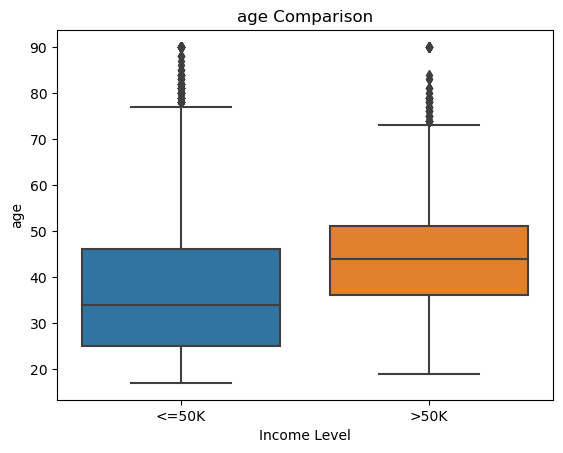

age    0.0
dtype: float64

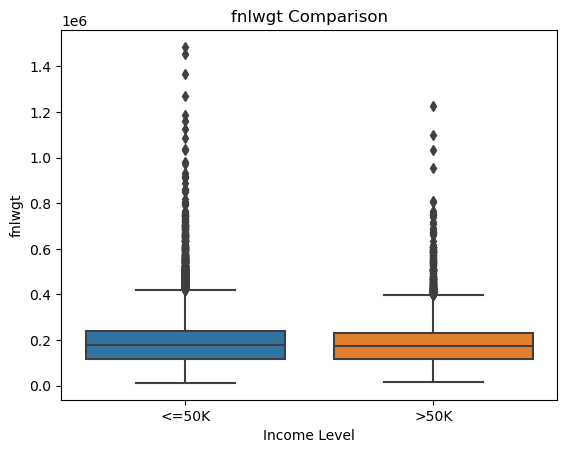

fnlwgt    0.0
dtype: float64

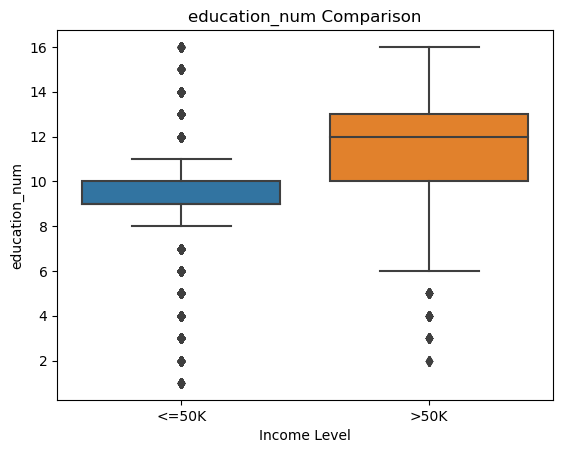

education_num    0.0
dtype: float64

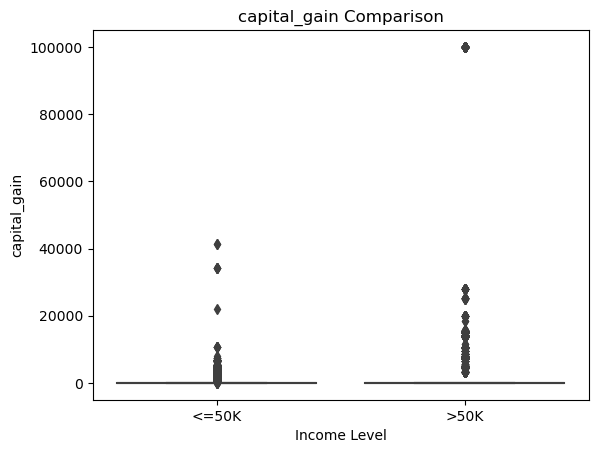

capital_gain    3.414377e-108
dtype: float64

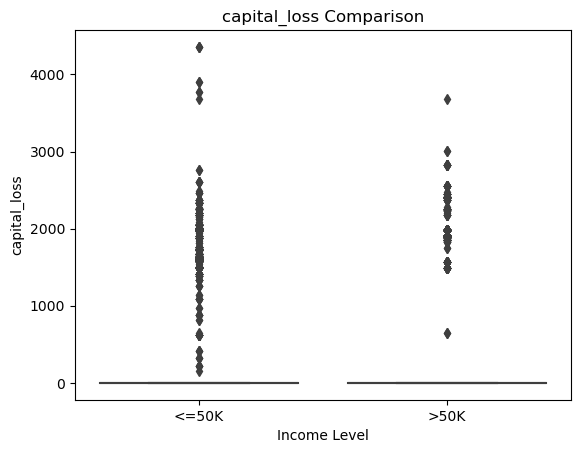

capital_loss    0.003841
dtype: float64

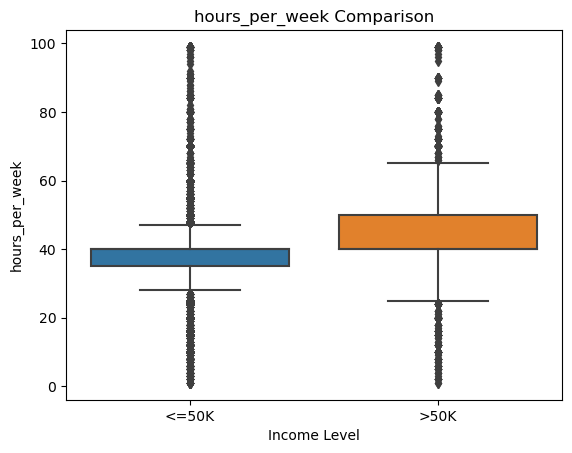

hours_per_week    0.0
dtype: float64

In [4]:
# summarize numeric data
display(trainDF.describe())

# suppress warnings
warnings.filterwarnings('ignore')

# numeric analysis function
def studyNumPredictor(pred):
    # boxplot by income level
    plot = sns.boxplot(x = trainDF['income'], y = trainDF[pred])
    plot.set(xlabel = 'Income Level', title = f"{pred} Comparison")
    plt.show()

    # single logistic regression
    logFit = LogisticRegression().fit(np.array(trainDF[pred]).reshape(-1, 1), trainDF['income'])
    logFit = sm.Logit(pd.get_dummies(trainDF['income'])['>50K'], trainDF[pred]).fit(disp = 0)
    display(logFit.pvalues)


# identify and study numeric predictors
findNumPredictors = make_column_selector(dtype_include = int)
for pred in trainDF[findNumPredictors].columns:
    studyNumPredictor(pred)

### Categorical Predictors

In [5]:
# categorical analysis function
def studyCatPredictor(pred):
    # construct contingency table
    contingency = pd.crosstab(trainDF['income'], trainDF[pred])
    display(contingency)

    # chi squared test for independence
    print(f"Chi-squared test p-value: {stats.chi2_contingency(contingency)[1]}")

# identify and study categorical predictors
findCatPredictors = make_column_selector(dtype_include = object)
for pred in trainDF.drop('income', axis = 1, inplace = False)[findCatPredictors].columns:
    studyCatPredictor(pred)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14
>50K,191,371,617,0,4963,622,724,353,0


Chi-squared test p-value: 2.026505431120716e-220


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


Chi-squared test p-value: 0.0


marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,3980,13,8284,384,10192,959,908
>50K,463,10,6692,34,491,66,85


Chi-squared test p-value: 0.0


occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,1652,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277
>50K,191,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320


Chi-squared test p-value: 0.0


relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
income,,,,,,
<=50K,7275,7449,944,5001,3228,823
>50K,5918,856,37,67,218,745


Chi-squared test p-value: 0.0


race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,275,763,2737,246,20699
>50K,36,276,387,25,7117


Chi-squared test p-value: 2.305960610160958e-70


sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


Chi-squared test p-value: 0.0


native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,
<=50K,437,12,82,55,57,70,68,24,97,60,...,33,102,9,64,31,15,17,21999,62,10
>50K,146,7,39,20,2,25,2,4,9,30,...,4,12,3,16,20,3,2,7171,5,6


Chi-squared test p-value: 2.2113858852543023e-44


### Model Preparation

In [6]:
# scale numeric predictors and encode categorical predictors
findNumPredictors = make_column_selector(dtype_include = int)
findCatPredictors = make_column_selector(dtype_include = object)
transform = make_column_transformer((MinMaxScaler(), findNumPredictors),
                                    (OneHotEncoder(drop = 'first'), findCatPredictors))

# get new column names
colNames = transform.fit(trainDF).get_feature_names_out()

# transform data
modelDF = pd.DataFrame.sparse.from_spmatrix(transform.fit_transform(trainDF), columns = colNames)

# set random seed
np.random.seed(432023)

# split data into predictors and response
resp = modelDF['onehotencoder__income_>50K'].rename('income')
modelDF.drop('onehotencoder__income_>50K', axis = 1, inplace = True)

# split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(modelDF, resp, test_size = 0.2)

### Model Fitting

A random forest model using 17 features achieved 85.64% cross-validation accuracy.

In [ ]:
# set random seed
np.random.seed(432023)

# tune random forest model
Mvalues = range(1, 20)
rfFit = RandomForestClassifier()
rfTune = GridSearchCV(rfFit,
                      param_grid = {'max_features': Mvalues},
                      cv = 5,
                      n_jobs = -1)
rfTune.fit(modelDF, resp)
M = rfTune.best_params_['max_features']

# fit random forest model
rfFit = RandomForestClassifier(max_features = M,
                               n_estimators = 1000)
cvResults = cross_val_score(rfFit,
                            modelDF,
                            resp,
                            cv = 10,
                            n_jobs = -1)

# cross-validation accuracy
print(f"Cross-validation accuracy: {np.mean(cvResults).round(4)}")